## Project



### Background  
In the field of online gaming, behavioral data offers rich insights into player engagement and preferences. Understanding how and when players interact with a game can help developers optimize user experiences and personalize outreach strategies. This project leverages real-world data collected from a Minecraft server operated by researchers at the University of British Columbia (UBC), which tracks player sessions including login and logout times.

Our goal is to investigate whether specific in-game behaviors can help predict if a player will subscribe to a game-related newsletter. By identifying such patterns, game developers can improve targeted communication and recruitment efforts.

### Research Question  
In this project, I choose question 1 which is:

**"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**

To answer this, we focus on two measurable behavioral features:
- The **average duration** of a player's sessions
- The **average time of day** the player logs in

Our specific research question becomes:  
**"Can average session duration and average login hour predict whether a player will subscribe to the newsletter?"**

### Data Description  
We use two datasets:
- **players.csv**: Contains each player's hashed email (`hashedEmail`) and whether or not they subscribed to the newsletter (`subscribe`, a Boolean variable). This dataset also includes demographic features such as age, gender, and play experience.
- **sessions.csv**: Contains individual session data for each player, including session `start_time` and `end_time`. From this, we calculate:
  - `session_duration` in minutes
  - `login_hour` extracted from the start time
  - These are then averaged per player to obtain `avg_session_duration` and `avg_login_hour`.

We join these datasets by the shared `hashedEmail` field to construct a new dataset used for modeling. The final dataset includes both the outcome variable (`subscribe`) and the engineered behavioral predictors.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
player<-read_csv("players.csv")
head(player)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
players_clean <- select(player, -hashedEmail, -name)
head(players_clean)

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17


In [4]:
gender<- players_clean|>
    group_by(gender)|>
    summarize(count=n())
gender

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


In [5]:
install.packages("mltools")
install.packages("data.table")

library(mltools)
library(data.table)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [9]:
players_clean$gender <- as.factor(players_clean$gender)
player_1h <- one_hot(as.data.table(players_clean))
head(player_1h)

experience,subscribe,played_hours,gender_Agender,gender_Female,gender_Male,gender_Non-binary,gender_Other,gender_Prefer not to say,gender_Two-Spirited,Age
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Pro,TRUE,30.3,0,0,1,0,0,0,0,9
Veteran,TRUE,3.8,0,0,1,0,0,0,0,17
Veteran,FALSE,0.0,0,0,1,0,0,0,0,17
Amateur,TRUE,0.7,0,1,0,0,0,0,0,21
Regular,TRUE,0.1,0,0,1,0,0,0,0,21
Amateur,TRUE,0.0,0,1,0,0,0,0,0,17


In [12]:
players_clean$experience <- as.factor(players_clean$experience)

player_exp <- players_clean |> select(-gender)

player_1h_exp <- one_hot(as.data.table(player_exp))

head(player_1h_exp)

experience_Amateur,experience_Beginner,experience_Pro,experience_Regular,experience_Veteran,subscribe,played_hours,Age
<int>,<int>,<int>,<int>,<int>,<lgl>,<dbl>,<dbl>
0,0,1,0,0,TRUE,30.3,9
0,0,0,0,1,TRUE,3.8,17
0,0,0,0,1,FALSE,0.0,17
1,0,0,0,0,TRUE,0.7,21
0,0,0,1,0,TRUE,0.1,21
1,0,0,0,0,TRUE,0.0,17


In [19]:
player_exp$experience <- player_exp$experience |>
  fct_recode("1" = "Beginner", 
             "2" = "Amateur", 
             "3" = "Regular", 
             "4" = "Veteran", 
             "5" = "Pro")
head(player_exp)

Warning message:
“Unknown levels in `f`: Beginner, Amateur, Regular, Veteran, Pro”


experience,subscribe,played_hours,Age
<fct>,<lgl>,<dbl>,<dbl>
5,TRUE,30.3,9
4,TRUE,3.8,17
4,FALSE,0.0,17
2,TRUE,0.7,21
3,TRUE,0.1,21
2,TRUE,0.0,17


In [27]:
library(tidymodels)

players <- read_csv("players.csv")

players <- players |> 
  mutate(subscribe = factor(subscribe))

set.seed(123)
split <- initial_split(players, prop = 0.8, strata = subscribe)
train <- training(split)
test <- testing(split)

rec <- recipe(subscribe ~ played_hours + Age, data = train)

mod <- nearest_neighbor(neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

wf <- workflow() |>
  add_model(mod) |>
  add_recipe(rec)

folds <- vfold_cv(train, v = 5, strata = subscribe)
grid_vals <- tibble(neighbors = seq(1, 15, 2))

res <- tune_grid(wf,resamples = folds,grid = grid_vals)

best_k <- select_best(res, metric = "accuracy")
final_wf <- finalize_workflow(wf, best_k)

final_fit <- last_fit(final_wf, split)
collect_metrics(final_fit)

collect_predictions(final_fit) |>
  conf_mat(truth = subscribe, estimate = .pred_class)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 30 rows.
               ✖ Assigned data has 31 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 31 to size 30.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.6250000,Preprocessor1_Model1
roc_auc,binary,0.4858934,Preprocessor1_Model1


          Truth
Prediction FALSE TRUE
     FALSE     5    9
     TRUE      6   20

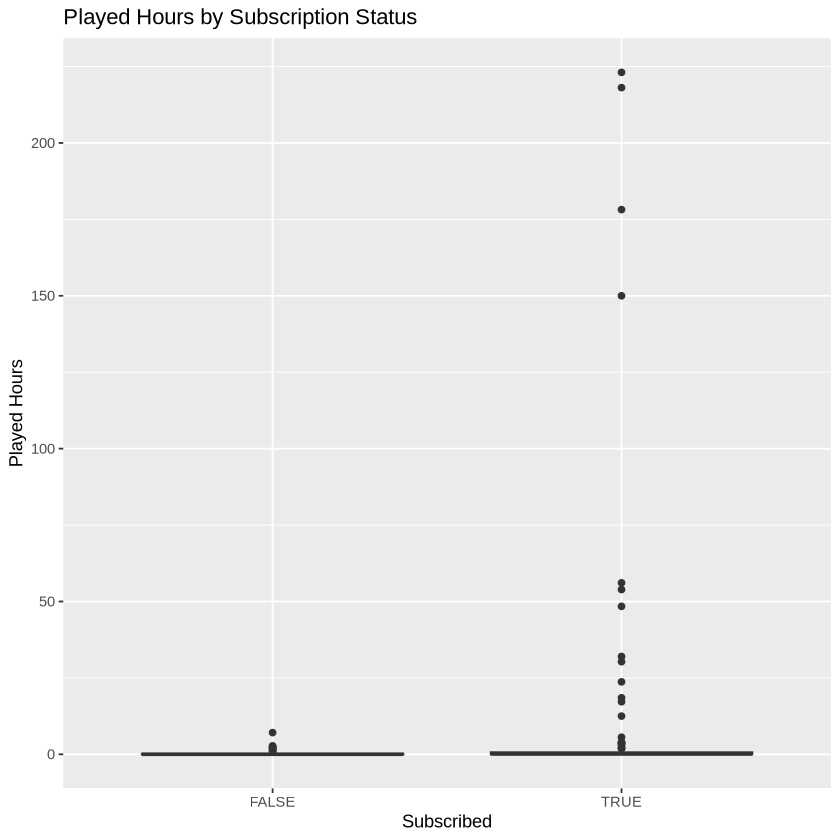

In [28]:
library(ggplot2)

ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  labs(
    title = "Played Hours by Subscription Status",
    x = "Subscribed",
    y = "Played Hours"
  )

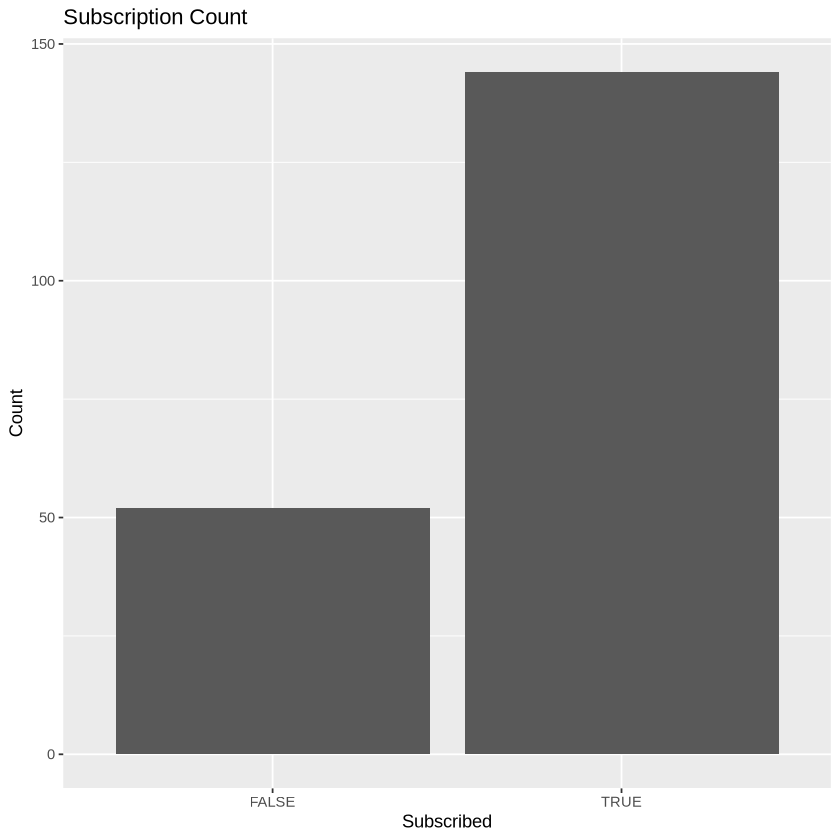

In [29]:
ggplot(players, aes(x = subscribe)) +
  geom_bar() +
  labs(title = "Subscription Count", x = "Subscribed", y = "Count")